## Instalación

In [1]:
pip install -q tensorflow tensorflow-datasets scikit-learn

DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/powerview-0.5.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/pycryptodome-3.19.0-py3.11-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/dnspython-2.2.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/impacket-0.10.1.dev1+20230909.241.3001b261-py3.11.egg 

## Importar las librerías

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

2024-04-18 05:36:34.320627: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-18 05:36:34.324463: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-18 05:36:34.378904: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-18 05:36:35.398853: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


<span style="color:red; font-size:30px;">Predicción</span>

## Crear el Dataset

In [2]:
# Crea listas vacias 
train_labels = []
train_samples = []

for i in range(150):
    # El 15% de los jovenes padecen enfermedades cardíacas
    random_younger = randint(13,44)
    train_samples.append(random_younger)
    train_labels.append(1)

    # El 15% de personas mayores padecen enfermedades cardíacas
    random_older = randint(45,100)
    train_samples.append(random_older)
    train_labels.append(0)

In [3]:
for i in range(850):
    # El 85% de los jovenes no padecen enfermedades cardíacas
    random_younger = randint(13,44)
    train_samples.append(random_younger)
    train_labels.append(0)

    # El 85% de las personas mayores no padecen enfermedades cardíacas
    random_older = randint(45,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [4]:
for i in train_samples:
    print(i)

24
64
17
48
40
84
44
72
19
57
31
99
38
87
43
74
23
67
14
90
27
90
39
59
17
54
35
85
15
69
36
60
25
73
36
61
33
59
30
81
33
93
39
94
35
58
14
88
24
94
26
69
36
74
26
97
37
70
23
53
39
68
24
80
27
45
39
79
32
53
20
94
43
98
39
64
38
50
29
52
15
82
18
95
14
80
18
62
14
53
21
66
18
71
32
72
14
60
24
55
15
92
15
79
35
68
13
80
38
64
20
82
34
75
37
56
24
66
23
60
22
53
26
82
26
60
19
45
24
97
25
45
30
65
35
84
34
98
42
100
29
84
30
55
20
68
26
55
34
48
39
89
38
82
24
66
27
59
26
90
20
81
26
87
39
89
39
96
38
82
39
78
24
90
40
100
17
77
29
58
23
60
29
85
29
50
27
97
37
81
41
81
40
62
20
85
18
51
42
46
41
84
29
51
15
92
41
69
17
47
21
100
39
75
43
63
28
58
18
89
17
82
23
58
22
62
38
69
36
65
29
63
34
86
31
67
26
68
15
83
23
53
28
75
22
93
21
58
34
81
31
94
19
62
15
46
14
70
38
51
14
96
32
95
34
55
16
97
28
93
38
71
35
61
22
75
35
70
32
72
30
87
23
100
24
83
32
50
19
95
15
57
34
47
35
63
25
80
23
50
32
82
30
87
17
55
23
88
21
64
16
72
36
92
31
51
23
73
17
74
22
93
27
46
18
75
29
61
40
71
41
79


In [5]:
for i in train_labels:
    print(i)

1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


In [6]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)   #Convierte ambas listas en arrays de numpy

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))   # Escala las edades a un rango entre -1 y 1

In [8]:
for i in scaled_train_samples:   # Itera sobre las edades escaladas
    print(i)

[0.81609195]
[0.03448276]
[0.64367816]
[0.5862069]
[0.40229885]
[0.02298851]
[0.24137931]
[0.74712644]
[0.32183908]
[0.89655172]
[0.66666667]
[0.5862069]
[0.50574713]
[0.24137931]
[0.32183908]
[0.50574713]
[0.20689655]
[0.]
[0.32183908]
[0.85057471]
[0.04597701]
[0.34482759]
[0.6091954]
[0.64367816]
[0.6091954]
[0.02298851]
[0.09195402]
[0.09195402]
[0.59770115]
[0.12643678]
[0.26436782]
[0.26436782]
[0.03448276]
[0.24137931]
[0.2183908]
[0.71264368]
[0.34482759]
[0.05747126]
[0.49425287]
[0.73563218]
[0.97701149]
[0.88505747]
[0.36781609]
[0.66666667]
[0.34482759]
[0.11494253]
[0.34482759]
[0.11494253]
[0.13793103]
[0.24137931]
[0.40229885]
[0.10344828]
[0.8045977]
[0.04597701]
[0.54022989]
[0.03448276]
[0.03448276]
[0.09195402]
[0.63218391]
[0.29885057]
[0.36781609]
[0.48275862]
[0.]
[0.2183908]
[0.08045977]
[0.12643678]
[0.51724138]
[0.11494253]
[0.81609195]
[0.37931034]
[0.45977011]
[0.48275862]
[0.02298851]
[0.16091954]
[0.10344828]
[0.93103448]
[0.26436782]
[0.3908046]
[0.0344827

## Creación de la Red Neuronal

In [9]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),   # Capa densa con una entrada y 16 nodos
    Dense(units=32, activation='relu'),   # Capa densa con 32 nodos y la misma función de activación
    Dense(units=2, activation='softmax')   # Capa de salida para la probabilidad de positivo o negativo
])

model.summary()   # Muestra un resumen de las características del modelo

/home/orfeo/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 642 (2.51 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Creación del modelo

# Configura el modelo para usar el optimizador 'adam'con su taza de aprendizaje y la función de perdida 
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Entrena el modelo
model.fit(
      x=scaled_train_samples   # Usa las muestras
    , y=train_labels   # Usa las etiquetas para positivo o negativo
    , validation_split=0.1   # Usa un 10% de los datos de entrenamiento como validación
    , batch_size=10   # Configura el tamaño de los batches
    , epochs=30   # Establece cuantas veces se realizará el entrenamiento
    , verbose=2
)

#model.fit(
#      x=scaled_train_samples
#    , y=train_labels
#    , validation_data=valid_set   # Los datos debe ser una tupla valid_set = (x_val, y_val) de matrices o tensores
#    , batch_size=10
#    , epochs=30
#    , verbose=2
#)

Epoch 1/30
180/180 - 2s - 14ms/step - accuracy: 0.5183 - loss: 0.6949 - val_accuracy: 0.7200 - val_loss: 0.6857
Epoch 2/30
180/180 - 0s - 1ms/step - accuracy: 0.7394 - loss: 0.6775 - val_accuracy: 0.7850 - val_loss: 0.6656
Epoch 3/30
180/180 - 0s - 1ms/step - accuracy: 0.7833 - loss: 0.6587 - val_accuracy: 0.8100 - val_loss: 0.6453
Epoch 4/30
180/180 - 0s - 1ms/step - accuracy: 0.7950 - loss: 0.6414 - val_accuracy: 0.8100 - val_loss: 0.6265
Epoch 5/30
180/180 - 0s - 1ms/step - accuracy: 0.7922 - loss: 0.6248 - val_accuracy: 0.8150 - val_loss: 0.6082
Epoch 6/30
180/180 - 0s - 1ms/step - accuracy: 0.8128 - loss: 0.6083 - val_accuracy: 0.8200 - val_loss: 0.5900
Epoch 7/30
180/180 - 0s - 1ms/step - accuracy: 0.8167 - loss: 0.5923 - val_accuracy: 0.8200 - val_loss: 0.5728
Epoch 8/30
180/180 - 0s - 1ms/step - accuracy: 0.8150 - loss: 0.5771 - val_accuracy: 0.8600 - val_loss: 0.5569
Epoch 9/30
180/180 - 0s - 1ms/step - accuracy: 0.8311 - loss: 0.5629 - val_accuracy: 0.8600 - val_loss: 0.5417


## Predicción

In [11]:
test_labels =  []
test_samples = []

for i in range(30):
    # El 15% de los jovenes padecen enfermedades cardíacas
    random_younger = randint(13,44)
    test_samples.append(random_younger)
    test_labels.append(1)

    # El 15% de personas mayores padecen enfermedades cardíacas
    random_older = randint(45,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(170):
    # El 85% de los jovenes no padecen enfermedades cardíacas
    random_younger = randint(13,44)
    test_samples.append(random_younger)
    test_labels.append(0)

    # El 85% de las personas mayores no padecen enfermedades cardíacas
    random_older = randint(45,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

# Hace una predicción tomando los datos de prueba
predictions = model.predict(
      x=scaled_test_samples
    , batch_size=10
    , verbose=0
) 

In [12]:
# Muestra un array con las predicciones
np.round(predictions)
for i in predictions:
    print(i)

[0.09324714 0.90675277]
[0.18896416 0.81103593]
[0.5305478  0.46945223]
[0.8506312  0.14936888]
[0.850915   0.14908497]
[0.32465684 0.6753431 ]
[0.6430428  0.35695714]
[0.25127152 0.7487284 ]
[0.10598931 0.8940107 ]
[0.8511036  0.14889644]
[0.85059446 0.14940554]
[0.84986424 0.15013571]
[0.09028371 0.90971625]
[0.85135835 0.14864168]
[0.74170476 0.25829527]
[0.09629757 0.90370244]
[0.85110354 0.14889644]
[0.12797038 0.87202954]
[0.25127152 0.7487284 ]
[0.6778728  0.32212722]
[0.10940626 0.89059377]
[0.77034587 0.22965415]
[0.17315467 0.82684535]
[0.08189655 0.91810346]
[0.16812259 0.8318774 ]
[0.2915946 0.7084055]
[0.13199134 0.8680086 ]
[0.41486025 0.58513963]
[0.60663235 0.39336768]
[0.4338402 0.5661598]
[0.15372625 0.8462737 ]
[0.85135835 0.14864168]
[0.85135835 0.14864168]
[0.16812259 0.8318774 ]
[0.6778728  0.32212722]
[0.5305478  0.46945223]
[0.39612976 0.6038702 ]
[0.26286212 0.7371378 ]
[0.12797038 0.8720296 ]
[0.56899714 0.43100283]
[0.79668176 0.20331828]
[0.8491311  0.150868

In [13]:
#Muestra la prediccón con probabilidad más alta
rounded_predictions = np.argmax(predictions, axis=-1)

for i in rounded_predictions:
    print(i)

1
1
0
0
0
1
0
1
1
0
0
0
1
0
0
1
0
1
1
0
1
0
1
1
1
1
1
1
0
1
1
0
0
1
0
0
1
1
1
0
0
0
1
0
1
1
0
1
0
1
0
0
0
1
1
1
1
0
0
0
1
1
0
0
1
0
0
0
1
1
1
0
0
1
0
0
0
0
0
1
1
0
1
1
1
0
0
1
1
0
0
0
1
1
1
1
1
0
1
0
1
0
1
1
0
0
0
0
1
1
1
0
0
1
0
0
1
0
0
0
0
0
1
1
1
1
0
0
0
1
0
0
1
0
0
0
0
0
1
1
0
0
0
1
1
0
0
1
1
0
0
1
0
0
1
0
0
1
1
0
0
1
0
0
1
0
0
1
0
0
0
1
1
1
1
0
1
1
1
0
1
0
1
1
0
0
1
0
0
0
0
1
1
1
1
1
0
1
1
0
0
1
0
0
1
1
1
1
0
1
0
1
0
0
0
1
1
0
0
0
0
1
0
0
0
1
0
0
1
0
1
0
0
0
0
1
0
0
0
1
1
1
0
0
0
0
0
1
0
1
1
1
0
1
0
1
1
0
1
1
0
0
0
0
1
1
0
1
1
0
0
0
1
1
1
0
1
1
0
1
1
0
1
1
1
1
1
1
1
0
0
0
1
0
0
1
0
0
1
0
1
1
0
1
0
0
1
0
1
1
1
1
1
1
0
1
1
1
0
1
0
1
0
0
1
1
0
1
0
1
1
0
0
1
1
0
1
0
1
1
0
1
1
0
0
0
1
1
1
0
0
0
0
0
1
1
0
0
0
0
1
1
1
1
0
0
0
0
0
1
1
1
0
0
1
1
0
0
1
0
0
0
0
1
0
0
0
0
0
1
1
1
0
1
1
0
1
0
0
0


## Matriz de confusión

In [14]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

Confusion matrix, without normalization
[[171  29]
 [ 37 163]]


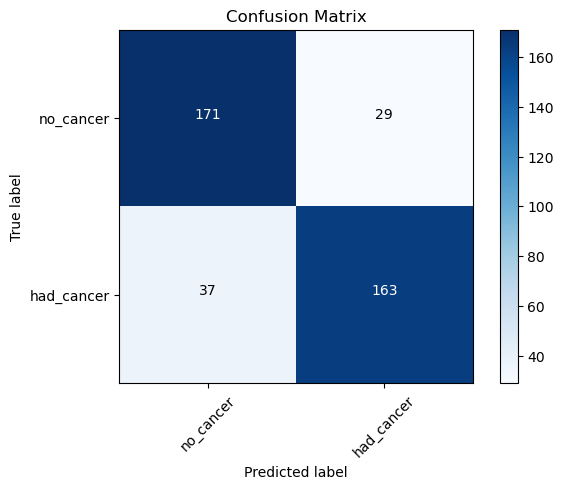

In [15]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Define las etiquetas para la matriz de confusión.
cm_plot_labels = ['no_cancer','had_cancer']

#Gráfica la matriz de confusión para validar la precisión de las predicciones
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [16]:
# Evalúa el modelo en el conjunto de prueba
model.evaluate(test_samples, test_labels)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5247 - loss: 51.7780  


[53.62788009643555, 0.5]

In [17]:
model.save('models/medical_trial_model.h5')   #Guarda el modelo

In [18]:
# Importa el modelo guardado en disco
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 644 (2.52 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [19]:
# Guarda el modelo en formato json.
json_string = model.to_json()
json_string

# Crea el modelo a partir de la nueva variable
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

model_architecture.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,286 (5.03 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 644 (2.52 KB)

<span style="color:red; font-size:30px;">Clasificación de imagenes</span>

## Importar las librerias

In [20]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import AveragePooling2D, Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

tfds.disable_progress_bar()

## Muestra los Datasets de Tensorflow

In [21]:
# https://www.tensorflow.org/datasets/overview
# https://www.tensorflow.org/datasets/catalog/overview
tfds.list_builders()

2024-04-18 05:39:40.038029: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bot_adversarial_dialogue',
 'bridge',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_b

## Muestra la información general del Dataset

In [22]:
builder = tfds.builder('rock_paper_scissors')
info = builder.info

info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_dir='/home/orfeo/tensorflow_datasets/rock_paper_scissors/3.0.0',
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
   

## Preparación de los datos

In [23]:
ds_train = tfds.load(name="rock_paper_scissors", split="train")
ds_test = tfds.load(name="rock_paper_scissors", split="test")

## Muestra algunos ejemplos del dataset

2024-04-18 05:40:00.504798: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-04-18 05:40:00.528879: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


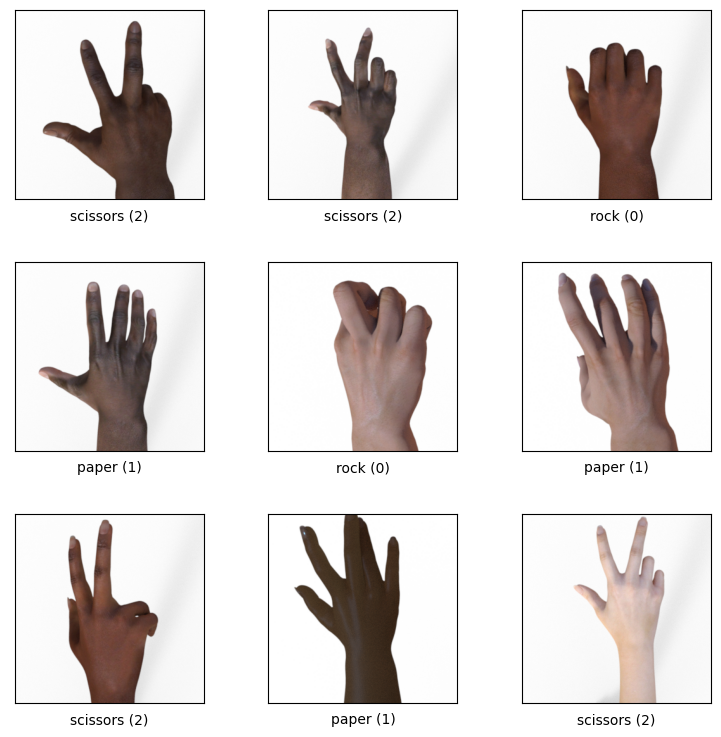

In [24]:
fig = tfds.show_examples(ds_train, info)

## Preparación de los datos

In [25]:
# Convierte las imágenes y las etiquetas del conjunto de entrenamiento a matrices numpy

# Itera sobre el conjunto de entrenamiento (ds_train), extrae las imágenes de cada ejemplo y conviértelas en matrices numpy. Se toma solo el primer canal de color (índice 0) de cada imagen.
train_images = np.array([example['image'].numpy()[:,:,0] for example in ds_train])
# Itera sobre el conjunto de entrenamiento (ds_train) y extrae las etiquetas de cada ejemplo, convirtiéndolas en matrices numpy.
train_labels = np.array([example['label'].numpy() for example in ds_train])

# Convierte las imágenes y las etiquetas del conjunto de prueba a matrices numpy

# Itera sobre el conjunto de prueba (ds_test), extrae las imágenes de cada ejemplo y conviértelas en matrices numpy. Se toma solo el primer canal de color (índice 0) de cada imagen.
test_images = np.array([example['image'].numpy()[:,:,0] for example in ds_test])
# Itera sobre el conjunto de prueba (ds_test) y extrae las etiquetas de cada ejemplo, convirtiéndolas en matrices numpy.
test_labels = np.array([example['label'].numpy() for example in ds_test])

2024-04-18 05:40:13.177526: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-18 05:40:13.733473: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-18 05:40:14.230298: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-18 05:40:14.311076: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [25]:
#Preprocesamiento de los datos de entrenamineto
#train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
#    .flow_from_directory(directory=train_images, target_size=(300,300), classes=['paper', 'rock', 'scissors'], batch_size=10)
#Preprocesamiento de los datos de prueba
#test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
#    .flow_from_directory(directory=test_images, target_size=(300,300), classes=['paper', 'rock', 'scissors'], batch_size=10)

# Redimensiona las imágenes de entrenamiento para que coincidan con la forma requerida por el modelo (2520, 300, 300, 1)
train_images = train_images.reshape(2520, 300, 300, 1)
# Redimensiona las imágenes de prueba para que coincidan con la forma requerida por el modelo (372, 300, 300, 1)
test_images = test_images.reshape(372, 300, 300, 1)

# Convierte los valores de píxeles de las imágenes de entrenamiento a tipo float32
train_images = train_images.astype('float32')
# Convierte los valores de píxeles de las imágenes de prueba a tipo float32
test_images = test_images.astype('float32')

# Normaliza los valores de píxeles de las imágenes de entrenamiento para que estén en el rango [0, 1]
train_images /= 255
# Normaliza los valores de píxeles de las imágenes de prueba para que estén en el rango [0, 1]
test_images /= 255

In [26]:
print("Forma de una imagen de entrenamiento:", train_images[0].shape)
print("Forma del dataset de imagenes de entrenamiento:", train_images.shape)
print("Forma del dataset de imagenes de prueba:", test_images.shape)

Forma de una imagen de entrenamiento: (300, 300)
Forma del dataset de imagenes de entrenamiento: (2520, 300, 300)
Forma del dataset de imagenes de prueba: (372, 300, 300)


## Entrenamiento de la Red Neuronal

In [27]:
# Crea un modelo secuencial de Keras
model = keras.Sequential([
    # Capa de aplanamiento para convertir la imagen en un vector unidimensional
    keras.layers.Flatten(),
    # Capa densa con 512 neuronas y activación ReLU
    keras.layers.Dense(512, activation='relu'),
    # Capa densa con 256 neuronas y activación ReLU
    keras.layers.Dense(256, activation='relu'),
    # Capa de salida con 3 neuronas (una para cada clase) y activación softmax
    keras.layers.Dense(3, activation='softmax')
])

# Compila el modelo con el optimizador Adam, la pérdida de entropía cruzada categórica dispersa y la métrica de precisión
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Entrena el modelo utilizando los datos de entrenamiento, con 5 épocas y un tamaño de lote de 32
model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 59s 705ms/step - accuracy: 0.3410 - loss: 16059.5889
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 81s 696ms/step - accuracy: 0.5562 - loss: 1141.6818
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 82s 695ms/step - accuracy: 0.7431 - loss: 285.2979
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 82s 699ms/step - accuracy: 0.7067 - loss: 606.2268
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 56s 706ms/step - accuracy: 0.8016 - loss: 184.0281


In [28]:
# Evalúa el modelo en el conjunto de prueba
model.evaluate(test_images, test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.3973 - loss: 1552.2634


[1625.3602294921875, 0.38978493213653564]

## Entrenamiento de una Red Neuronal Convolucional (CNN)

In [29]:
# Crea un modelo secuencial de Keras
model = keras.Sequential([
    # Capa convolucional con 64 filtros de tamaño 3x3 y activación ReLU
    # La primera capa especifica la forma de entrada de las imágenes (300x300x1)
    keras.layers.Conv2D(64, 3, activation='relu', input_shape=(300, 300, 1)),
    # Capa convolucional con 32 filtros de tamaño 3x3 y activación ReLU
    keras.layers.Conv2D(32, 3, activation='relu'),
    # Capa de aplanamiento para convertir las salidas de las capas convolucionales en un vector unidimensional
    keras.layers.Flatten(),
    # Capa densa con 3 neuronas (una para cada clase) y activación softmax para la clasificación
    keras.layers.Dense(3, activation='softmax')
])

# Compila el modelo con el optimizador Adam, la pérdida de entropía cruzada categórica dispersa y la métrica de precisión
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Entrena el modelo utilizando los datos de entrenamiento, con 5 épocas y un tamaño de lote de 32
model.fit(train_images, train_labels, epochs=5, batch_size=32)

/home/orfeo/.local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/5
20/79 ━━━━━━━━━━━━━━━━━━━━ 7:01 7s/step - accuracy: 0.4465 - loss: 5199.3252

KeyboardInterrupt: 

In [30]:
# Evalúa el modelo en el conjunto de prueba
model.evaluate(test_images, test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.4952 - loss: 1.5945


[1.686354637145996, 0.49193549156188965]

## CNN Modificada #1

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

# Crea un modelo secuencial de Keras
model = keras.Sequential([
    # Capa de promediado (Average Pooling) con ventana de 6x6 y stride de 3x3
    # La capa de promediado reduce la dimensionalidad de la entrada
    keras.layers.AveragePooling2D(6, 3, input_shape=(300, 300, 1)),
    # Primera capa convolucional con 64 filtros de tamaño 3x3 y activación ReLU
    keras.layers.Conv2D(64, 3, activation='relu'),
    # Segunda capa convolucional con 32 filtros de tamaño 3x3 y activación ReLU
    keras.layers.Conv2D(32, 3, activation='relu'),
    # Capa de reducción de tamaño (Max Pooling) con ventana de 2x2 y stride de 2x2
    # Reduce la dimensionalidad de las características extraídas por las capas convolucionales
    keras.layers.MaxPool2D(2, 2),
    # Capa de regularización Dropout para reducir el sobreajuste
    # Apaga aleatoriamente el 50% de las neuronas durante el entrenamiento
    keras.layers.Dropout(0.5),
    # Capa de aplanamiento para convertir las salidas de las capas convolucionales en un vector unidimensional
    keras.layers.Flatten(),
    # Capa densa con 128 neuronas y activación ReLU
    keras.layers.Dense(128, activation='relu'),
    # Capa de salida con 3 neuronas (una para cada clase) y activación softmax para la clasificación
    keras.layers.Dense(3, activation='softmax')
])

# Compila el modelo con el optimizador Adam, la pérdida de entropía cruzada categórica dispersa y la métrica de precisión
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Entrena el modelo utilizando los datos de entrenamiento, con 5 épocas y un tamaño de lote de 32
model.fit(train_images, train_labels, epochs=5, batch_size=32)

#early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)  
# Detener el entrenamiento si la pérdida de validación deja de mejorar
#model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

/home/orfeo/.local/lib/python3.11/site-packages/keras/src/layers/pooling/base_pooling.py:23: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(name=name, **kwargs)


Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 57s 700ms/step - accuracy: 0.5583 - loss: 1.2911
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 56s 713ms/step - accuracy: 0.9833 - loss: 0.0806
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 82s 719ms/step - accuracy: 0.9959 - loss: 0.0266
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 85s 757ms/step - accuracy: 0.9994 - loss: 0.0055
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 65s 829ms/step - accuracy: 0.9837 - loss: 0.0570


In [14]:
# Evalúa el modelo en el conjunto de prueba
model.evaluate(test_images,test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - accuracy: 0.6890 - loss: 1.3152


[1.4767117500305176, 0.6720430254936218]

## CNN Modificada #2

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import LeakyReLU

# Aumento de datos
# Define un generador de datos de imagen con varias transformaciones para aumentar el conjunto de datos de entrenamiento.
# Estas transformaciones incluyen rotación, desplazamiento horizontal y vertical, cizallamiento, zoom y volteo horizontal y vertical.
#train_datagen = ImageDataGenerator(
#    rescale=1./255,
#    rotation_range=20,
#    width_shift_range=0.2,
#    height_shift_range=0.2,
#    shear_range=0.2,
#    zoom_range=0.1,
#    horizontal_flip=True,
#    vertical_flip=True,
#)

# Genera datos de entrenamiento aumentados utilizando el generador de datos de imagen.
#train_generator = train_datagen.flow(train_images, train_labels, batch_size=32)

# Define el modelo
model = Sequential([
    # Capa de promediado (Average Pooling) con ventana de 6x6 y stride de 3x3
    keras.layers.AveragePooling2D(6, 3, input_shape=(300, 300, 1)),
    # Primera capa convolucional con 128 filtros de tamaño 3x3 y activación ReLU
    keras.layers.Conv2D(128, 3, activation='relu'),   # Usando más neuronas
    # Capa de reducción de tamaño (Max Pooling) con ventana de 2x2 y stride de 2x2
    keras.layers.MaxPooling2D(2),
    # Segunda capa convolucional con 64 filtros de tamaño 3x3 y activación LeakyReLU
    keras.layers.Conv2D(64, 3, activation=LeakyReLU()),  # Usando LeakyReLU en esta capa
    # Capa de reducción de tamaño (Max Pooling) con ventana de 2x2 y stride de 2x2
    keras.layers.MaxPooling2D(2, 2),
    # Capa de regularización Dropout para reducir el sobreajuste
    keras.layers.Dropout(0.5),
    # Capa de aplanamiento para convertir las salidas de las capas convolucionales en un vector unidimensional
    keras.layers.Flatten(),
    # Capa densa con 256 neuronas y activación ReLU
    keras.layers.Dense(256, activation='relu'),
    # Capa de salida con 3 neuronas (una para cada clase) y activación softmax para la clasificación
    keras.layers.Dense(3, activation='softmax')
])

# Compila el modelo con el optimizador Adam, la pérdida de entropía cruzada categórica dispersa y la métrica de precisión
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Entrena el modelo con los datos de entrenamiento sin aumento de datos
model.fit(train_images, train_labels, epochs=5, batch_size=32)

# Entrena el modelo con los datos de entrenamiento aumentados
#model.fit(train_generator, epochs=5, steps_per_epoch=len(train_images) / 32)
# Se puede utilizar un generador de datos de imagen para entrenar el modelo con los datos aumentados
# en lugar de los datos de entrenamiento originales.

Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 58s 715ms/step - accuracy: 0.3955 - loss: 1.8859
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 58s 733ms/step - accuracy: 0.8527 - loss: 0.4339
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 61s 771ms/step - accuracy: 0.9887 - loss: 0.0553
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 67s 847ms/step - accuracy: 0.9959 - loss: 0.0163
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 78s 800ms/step - accuracy: 1.0000 - loss: 0.0049


In [16]:
# Evalúa el modelo en el conjunto de prueba
model.evaluate(test_images, test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 219ms/step - accuracy: 0.7307 - loss: 1.3371


[1.5293382406234741, 0.7043010592460632]

## CNN Modificada #3

In [17]:
from tensorflow.keras.layers import LeakyReLU

model = Sequential([
    keras.layers.AveragePooling2D(6, 3, input_shape=(300, 300, 1)),
    keras.layers.Conv2D(128, 3, activation='gelu'),   # Usando más neuronas y otra función de activación
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(64, 3, activation=LeakyReLU()),  # Usando LeakyReLU en esta capa
    #keras.layers.BatchNormalization(),  # Normalización por lotes para estabilizar y acelerar el entrenamiento
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    #keras.layers.Dense(32, activation='elu'),
    #keras.layers.Dense(64, activation='tanh'),   # Agregando una nueva capa densa con activación elu
    keras.layers.Dense(3, activation='softmax')
])


# Compilar el modelo
optimizer = keras.optimizers.Adam(learning_rate=0.001)  # Reducimos la tasa de aprendizaje para evitar problemas de desvanecimiento del gradiente
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',  # Función de pérdida adecuada para problemas de clasificación multiclase
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.4536 - loss: 1.1049
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.9346 - loss: 0.2432
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.9928 - loss: 0.0501
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.9924 - loss: 0.0241
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.9997 - loss: 0.0074


In [18]:
model.evaluate(test_images, test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 323ms/step - accuracy: 0.7261 - loss: 0.9276


[0.9864982962608337, 0.7177419066429138]

## CNN Modificada #4

In [19]:
def mish(x):
    return x * tf.math.tanh(tf.math.softplus(x))

model = Sequential([
    keras.layers.AveragePooling2D(6, 3, input_shape=(300, 300, 1)),
    keras.layers.Conv2D(64, 3, activation='relu'),   # Usando más neuronas
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(32, 3, activation=LeakyReLU()),  # Usando LeakyReLU en esta capa
    #keras.layers.BatchNormalization(),  # Normalización por lotes para estabilizar y acelerar el entrenamiento
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    #keras.layers.Dense(32, activation='elu'),
    keras.layers.Dense(64, activation='mish'),   # Agregando una nueva capa densa con activación no monotónica
    keras.layers.Dense(3, activation='softmax')
])

# Compilar el modelo
optimizer = keras.optimizers.Adam(learning_rate=0.001)  # Reducimos la tasa de aprendizaje para evitar problemas de desvanecimiento del gradiente
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',  # Función de pérdida adecuada para problemas de clasificación multiclase
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(train_images, train_labels, epochs=6, batch_size=32)

Epoch 1/6
79/79 ━━━━━━━━━━━━━━━━━━━━ 26s 308ms/step - accuracy: 0.4470 - loss: 1.1608
Epoch 2/6
79/79 ━━━━━━━━━━━━━━━━━━━━ 25s 312ms/step - accuracy: 0.9430 - loss: 0.1928
Epoch 3/6
79/79 ━━━━━━━━━━━━━━━━━━━━ 25s 313ms/step - accuracy: 0.9836 - loss: 0.0574
Epoch 4/6
79/79 ━━━━━━━━━━━━━━━━━━━━ 25s 315ms/step - accuracy: 0.9975 - loss: 0.0127
Epoch 5/6
79/79 ━━━━━━━━━━━━━━━━━━━━ 25s 316ms/step - accuracy: 0.9981 - loss: 0.0065
Epoch 6/6
79/79 ━━━━━━━━━━━━━━━━━━━━ 25s 316ms/step - accuracy: 0.9981 - loss: 0.0064


In [20]:
model.evaluate(test_images, test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.7342 - loss: 1.4290


[1.568380355834961, 0.7123655676841736]

## CNN Modificada #5

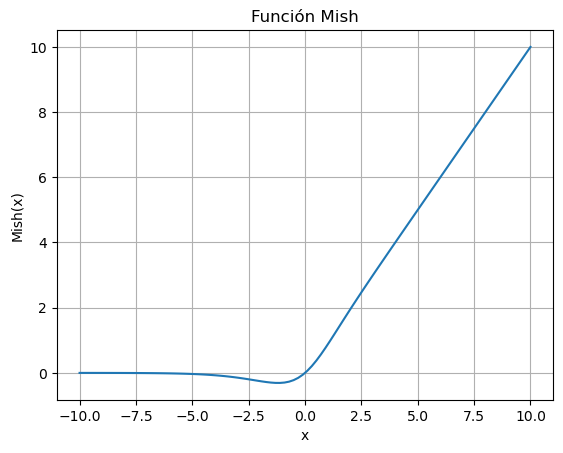

In [2]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mish(x):
    return x * np.tanh(np.log(1 + np.exp(x)))

# Ejemplo de la función mish
x = np.linspace(-10, 10, 100)
y = mish(x)

import matplotlib.pyplot as plt

plt.plot(x, y)
plt.title('Función Mish')
plt.xlabel('x')
plt.ylabel('Mish(x)')
plt.grid(True)
plt.show()

In [31]:
def mish(x):
    return x * tf.math.tanh(tf.math.softplus(x))

model = Sequential([
    keras.layers.AveragePooling2D(6, 3, input_shape=(300, 300, 1)),
    keras.layers.Conv2D(128, 3, activation='mish'),   # Usando más neuronas
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(64, 3, activation='mish'),  # Usando LeakyReLU en esta capa
    #keras.layers.BatchNormalization(),  # Normalización por lotes para estabilizar y acelerar el entrenamiento
    keras.layers.MaxPooling2D(2, 2),
    #keras.layers.Dense(256, activation='relu'),
    #keras.layers.Dense(32, activation='elu'),
    keras.layers.Dense(256, activation='mish'),   # Agregando una nueva capa densa con activación no monotónica
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='mish'),
    keras.layers.Dense(3, activation='softmax')
])

# Compilar el modelo
optimizer = keras.optimizers.Adam(learning_rate=0.001)  # Reducimos la tasa de aprendizaje para evitar problemas de desvanecimiento del gradiente
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',  # Función de pérdida adecuada para problemas de clasificación multiclase
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(train_images, train_labels, epochs=6, batch_size=32)

/home/orfeo/.local/lib/python3.11/site-packages/keras/src/layers/pooling/base_pooling.py:23: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(name=name, **kwargs)


Epoch 1/6
79/79 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.5164 - loss: 0.9481
Epoch 2/6
79/79 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9628 - loss: 0.0965
Epoch 3/6
79/79 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.9963 - loss: 0.0119
Epoch 4/6
79/79 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.9977 - loss: 0.0156
Epoch 5/6
79/79 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 1.0000 - loss: 0.0017
Epoch 6/6
79/79 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 1.0000 - loss: 0.0017


In [32]:
model.evaluate(test_images, test_labels) #Mish mish

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 404ms/step - accuracy: 0.7426 - loss: 1.6219


[1.7496097087860107, 0.7284946441650391]

In [33]:
# Hacer predicciones en el conjunto de prueba
predictions = model.predict(test_images, steps=len(test_images), verbose=0)

# Cada predicción es un vector de probabilidades para cada clase.
# Puedes obtener la clase predicha para cada ejemplo tomando el índice del valor máximo del vector de probabilidades.
predicted_classes = predictions.argmax(axis=1)

# También puedes imprimir las clases predichas si deseas verificarlas.
print(predicted_classes)

[2 1 0 1 0 0 1 1 2 1 2 2 0 0 1 2 2 2 1 1 1 0 1 1 2 1 0 0 2 0 1 0 1 2 0 0 1
 0 1 1 2 1 0 1 1 2 0 1 0 1 0 2 0 1 2 1 2 2 1 1 1 2 0 2 2 2 2 1 2 1 0 1 2 2
 1 0 1 0 0 1 0 2 1 2 1 1 0 2 2 0 2 2 1 2 2 1 2 0 0 2 1 1 0 0 0 0 1 2 1 2 2
 2 1 1 0 2 1 1 1 1 1 1 1 1 1 0 0 2 1 0 1 1 2 1 2 1 1 0 2 0 1 0 2 1 0 2 0 0
 1 1 1 1 1 1 1 2 0 1 2 1 1 0 0 0 2 2 0 2 2 1 0 2 2 0 0 1 1 2 1 1 2 1 0 1 2
 2 2 1 1 1 2 2 2 1 1 1 1 2 0 1 2 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 2 1 1 0 2 2
 0 1 0 1 1 0 0 0 0 2 1 2 1 1 1 1 1 2 1 1 1 1 0 1 1 0 1 1 1 1 2 0 1 2 1 0 1
 1 0 0 2 2 0 2 1 1 1 0 1 0 0 2 1 1 2 2 1 1 1 1 2 1 0 1 2 1 2 2 2 1 1 0 1 1
 1 1 0 1 0 1 2 1 0 1 1 1 1 2 1 0 1 0 0 2 0 0 0 1 0 2 1 1 1 0 2 0 1 1 2 1 1
 1 0 1 1 2 2 1 1 1 1 1 0 0 1 1 2 0 0 2 2 2 0 2 0 0 1 1 1 1 0 1 2 0 0 2 1 1
 1 1]


## Aumento de datos

In [34]:
# Cargar el conjunto de datos
ds_train = tfds.load(name="rock_paper_scissors", split="train")
ds_test = tfds.load(name="rock_paper_scissors", split="test")

# Convierte las imágenes y las etiquetas del conjunto de entrenamiento a matrices numpy
train_images = np.array([example['image'].numpy()[:,:,0] for example in ds_train])
train_labels = np.array([example['label'].numpy() for example in ds_train])

# Convierte las imágenes y las etiquetas del conjunto de prueba a matrices numpy
test_images = np.array([example['image'].numpy()[:,:,0] for example in ds_test])
test_labels = np.array([example['label'].numpy() for example in ds_test])

# Redimensiona las imágenes de entrenamiento para que coincidan con la forma requerida por el modelo (2520, 300, 300, 1)
train_images = train_images.reshape(2520, 300, 300, 1)
# Redimensiona las imágenes de prueba para que coincidan con la forma requerida por el modelo (372, 300, 300, 1)
test_images = test_images.reshape(372, 300, 300, 1)

# Convierte los valores de píxeles de las imágenes de entrenamiento a tipo float32
train_images = train_images.astype('float32')
# Convierte los valores de píxeles de las imágenes de prueba a tipo float32
test_images = test_images.astype('float32')

# Normaliza los valores de píxeles de las imágenes de entrenamiento para que estén en el rango [0, 1]
train_images /= 255
# Normaliza los valores de píxeles de las imágenes de prueba para que estén en el rango [0, 1]
test_images /= 255

# Define el generador de aumentación de datos con las transformaciones deseadas
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,  # Rango de rotación aleatoria (en grados)
    width_shift_range=0.2,  # Desplazamiento aleatorio horizontal (como fracción del ancho total)
    height_shift_range=0.2,  # Desplazamiento aleatorio vertical (como fracción de la altura total)
    shear_range=0.2,  # Factor de distorsión de corte
    zoom_range=0.2,  # Rango de zoom aleatorio
    horizontal_flip=True,  # Volteo horizontal aleatorio
    fill_mode='nearest'  # Estrategia para rellenar píxeles después de las transformaciones
)

# Define el modelo
model = Sequential([
    keras.layers.AveragePooling2D(6, 3, input_shape=(300, 300, 1)),
    keras.layers.Conv2D(128, 3, activation='mish'),   # Usando más neuronas
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(64, 3, activation='mish'),  # Usando LeakyReLU en esta capa
    keras.layers.MaxPooling2D(2, 2),
    #keras.layers.BatchNormalization(),  # Normalización por lotes para estabilizar y acelerar el entrenamiento
    #keras.layers.Dense(256, activation='relu'),
    #keras.layers.Dense(32, activation='elu'),
    keras.layers.Dense(256, activation='mish'),   # Agregando una nueva capa densa con activación no monotónica
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(0.3),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='mish'),
    keras.layers.Dense(3, activation='softmax')
])

# Compila el modelo con el optimizador Adam, la pérdida de entropía cruzada categórica dispersa y la métrica de precisión
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Entrena el modelo con los datos de entrenamiento aumentados
# Genera lotes de imágenes aumentadas dinámicamente durante el entrenamiento
train_generator = datagen.flow(train_images, train_labels, batch_size=32)

# Ajusta el modelo utilizando el generador de datos de entrenamiento
model.fit(train_generator, epochs=5)

2024-04-18 03:52:22.525060: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-18 03:52:23.073486: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-18 03:52:23.591037: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-18 03:52:23.664531: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 1/5


/home/orfeo/.local/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.3691 - loss: 1.1573
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.5182 - loss: 0.9523
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.6492 - loss: 0.7205
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.7300 - loss: 0.6236
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.7685 - loss: 0.5508


In [35]:
model.evaluate(test_images, test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 371ms/step - accuracy: 0.7173 - loss: 0.6358


[0.6437930464744568, 0.7177419066429138]

## Hyperparameter Tuning

In [9]:
pip install -U keras-tuner imageio

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/powerview-0.5.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/pycryptodome-3.19.0-py3.11-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/dnspython-2.2.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/p

In [ ]:
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = keras.Sequential()

    # Capa de promediado para reducir el tamaño de las imágenes de entrada
    model.add(keras.layers.AveragePooling2D(6,3,input_shape=(300,300,1)))

    # Bucle para agregar capas convolucionales con hiperparámetros ajustables
    for i in range(hp.Int("Conv Layers", min_value=0, max_value=3)):
        filters = hp.Choice(f"layer_{i}_filters", [16,32,64])   # Selecciona el número de filtros para la capa convolucional actual de forma aleatoria
        model.add(keras.layers.Conv2D(filters, 3, activation='mish'))   # Agrega una capa convolucional con activación 'mish'

    dense_units = hp.Choice("Dense layer", [64, 128, 256, 512, 1024])   # Capa densa con activación 'mish'
    model.add(keras.layers.Dense(dense_units, activation='mish'))
    model.add(keras.layers.MaxPool2D(2,2))   # Capa de reducción de tamaño
    
    dense_units = hp.Choice("Dense layer", [64, 128, 256, 512, 1024])   # Capa densa con activación 'mish'
    model.add(keras.layers.Dense(dense_units, activation='mish'))
    model.add(keras.layers.MaxPool2D(2,2))   # Capa de reducción de tamaño  
    model.add(keras.layers.Dropout(0.4))   # Capa de regularización Dropout para evitar el sobreajuste
    model.add(keras.layers.Flatten())   # Capa de aplanamiento para convertir las salidas de las capas convolucionales en un vector unidimensional

    dense_units = hp.Choice("Dense layer", [64, 128, 256, 512, 1024])   # Capa densa con activación 'mish'
    model.add(keras.layers.Dense(dense_units, activation='mish'))

    # Capa de salida con activación 'softmax' para la clasificación multiclase
    model.add(keras.layers.Dense(3, activation='softmax'))

    # Compila el modelo con el optimizador 'adam', función de pérdida y métrica de evaluación
    model.compile(optimizer='adam',
                  loss=keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
    
    return model

# Inicializa el sintonizador para la búsqueda aleatoria de hiperparámetros
tuner = RandomSearch(
    build_model,  # Función que construye el modelo
    objective='val_accuracy',  # Objetivo a maximizar durante la búsqueda
    max_trials=32,  # Número máximo de configuraciones de hiperparámetros a probar
)

# Realiza la búsqueda aleatoria de hiperparámetros ajustando el modelo en los datos de entrenamiento
tuner.search(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=32)

In [1]:
best_model = tuner.get_best_models()[0]

NameError: name 'tuner' is not defined

In [ ]:
best_model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 13ms/step - loss: 1.3729 - accuracy: 0.7339


[1.3729289770126343, 0.7338709831237793]

In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
average_pooling2d (AveragePo (None, 99, 99, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 97, 97, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 95, 95, 32)        18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 47, 47, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 70688)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              7

In [ ]:
tuner.results_summary()

## Guarda y carga el modelo


In [ ]:
best_model.save('./my_model')

In [ ]:
loaded_model = keras.models.load_model('./my_model')

In [ ]:
loaded_model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 12ms/step - loss: 1.3729 - accuracy: 0.7339


[1.3729289770126343, 0.7338709831237793]

## Gráfica una imagen desde un Numpy Array

2024-04-18 05:51:39.268561: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


(300, 300, 3)

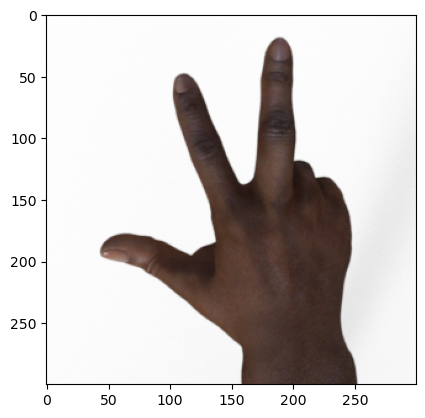

In [30]:
rgb_images = np.array([example['image'].numpy() for example in ds_train.take(1)])
rgb_image = rgb_images[0]

image = train_images[0].reshape(300,300)

plt.imshow(rgb_image)

rgb_image.shape

## Aumento de datos

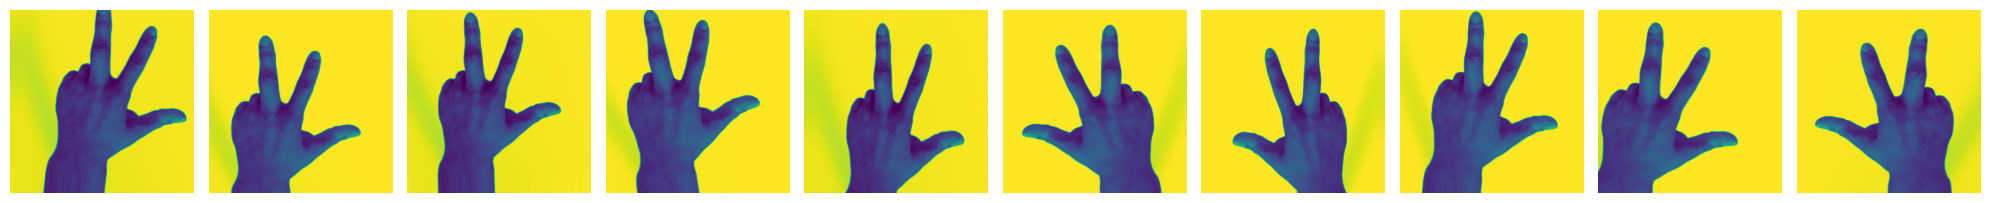

In [38]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
        height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
        channel_shift_range=10., horizontal_flip=True)

chosen_image = train_images[0]

# Ajustamos la forma de la imagen para que tenga un rango de 4
image = np.expand_dims(chosen_image, axis=0)  # Añadimos una dimensión de lote

# El generador de flujo de datos espera imágenes con una forma de (altura, ancho, canales)
# Aquí establecemos una forma de (altura, ancho, canales) compatible con las imágenes originales
image = np.expand_dims(image, axis=-1)  # Añadimos una dimensión de canal

aug_iter = gen.flow(image)   # Genera batches de imágenes aumentadas de la imagen seleccionada
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]   # Crea 10 imágenes aumentadas

plotImages(aug_images)

## Hace un predicción apartir de una sola muestra

In [ ]:
result = best_model.predict(np.array([train_images[0]]))
print(result)

predicted_value = np.argmax(result)
print(predicted_value)

array([[4.5396062e-15, 1.5290578e-12, 1.0000000e+00]], dtype=float32)

## Convertir imagenes PNG/JPG a formato Numpy

In [10]:
import imageio

im = imageio.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/9/9e/Led_Zeppelin_logo.svg/250px-Led_Zeppelin_logo.svg.png')

print(type(im))

im_np = np.asarray(im)

print(im_np.shape)

/tmp/ipykernel_15602/1569471400.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/9/9e/Led_Zeppelin_logo.svg/250px-Led_Zeppelin_logo.svg.png')


<class 'numpy.ndarray'>
(86, 250, 3)


/usr/lib/python3/dist-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
